In [1]:
from scipy.stats import dirichlet
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%matplotlib inline

In [175]:
np.log10(50)

1.6989700043360187

In [2]:
steps = 50
alpha_range = np.logspace(0, 1.7, num=steps)
alpha_1 = np.concatenate([alpha_range[:-1], 
                          np.tile(alpha_range.max(), steps - 1), 
                          alpha_range[::-1][:-1], 
                          np.tile(alpha_range.min(), steps - 1)])
alpha_2 = np.concatenate([np.tile(alpha_range.min(), steps - 1), 
                          alpha_range[:-1], 
                          np.tile(alpha_range.max(), steps-1), alpha_range[::-1][:-1]])
print(alpha_1.shape)
print(alpha_2.shape)
alphas = np.vstack((alpha_1, alpha_2)).T
print(alphas)    

(196,)
(196,)
[[ 1.          1.        ]
 [ 1.08316315  1.        ]
 [ 1.17324241  1.        ]
 [ 1.27081295  1.        ]
 [ 1.37649776  1.        ]
 [ 1.49097166  1.        ]
 [ 1.61496556  1.        ]
 [ 1.74927119  1.        ]
 [ 1.89474609  1.        ]
 [ 2.05231915  1.        ]
 [ 2.22299648  1.        ]
 [ 2.40786788  1.        ]
 [ 2.60811376  1.        ]
 [ 2.82501272  1.        ]
 [ 3.05994969  1.        ]
 [ 3.31442475  1.        ]
 [ 3.59006276  1.        ]
 [ 3.8886237   1.        ]
 [ 4.2120139   1.        ]
 [ 4.56229826  1.        ]
 [ 4.94171336  1.        ]
 [ 5.35268182  1.        ]
 [ 5.79782772  1.        ]
 [ 6.27999335  1.        ]
 [ 6.80225739  1.        ]
 [ 7.36795456  1.        ]
 [ 7.98069689  1.        ]
 [ 8.6443968   1.        ]
 [ 9.36329209  1.        ]
 [10.14197298  1.        ]
 [10.98541142  1.        ]
 [11.89899286  1.        ]
 [12.88855062  1.        ]
 [13.96040312  1.        ]
 [15.12139425  1.        ]
 [16.37893707  1.        ]
 [17.74106111 

MovieWriter ffmpeg unavailable; using Pillow instead.


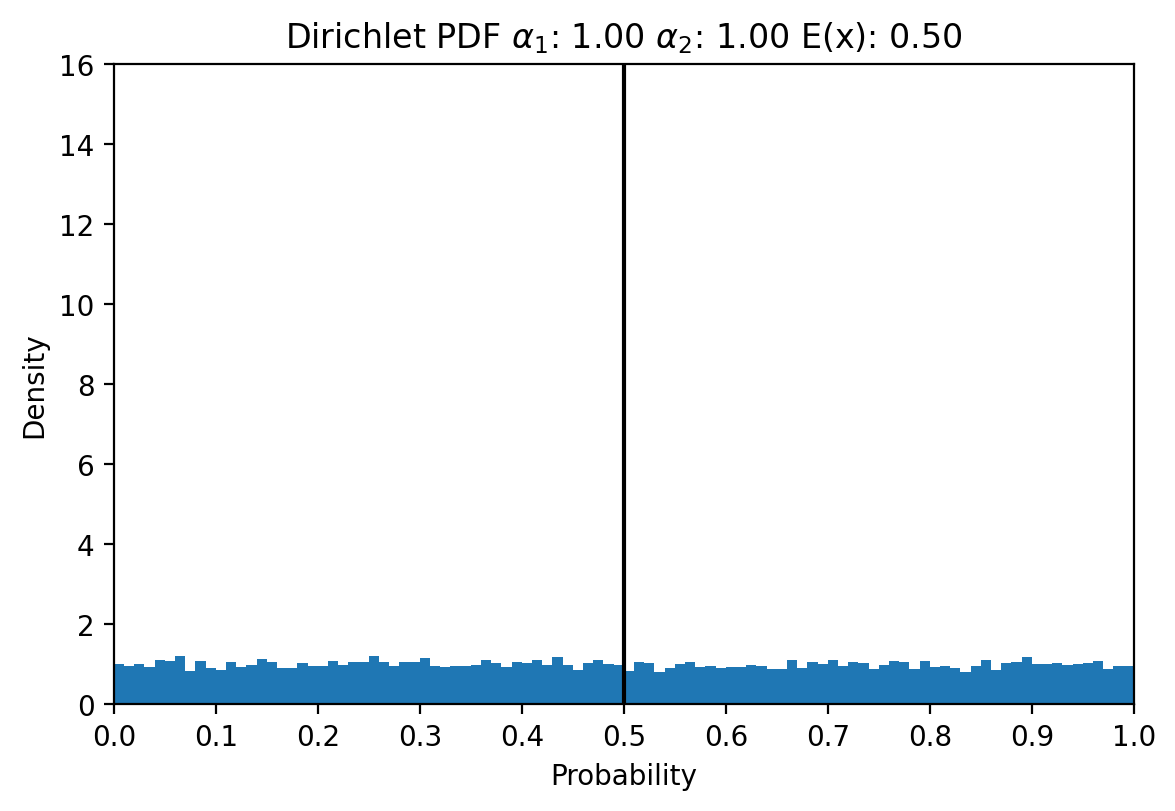

In [208]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = plt.axes([0.1, 0.12, 0.85, 0.8])


def dir_pdf(alphas):
    ax.clear()
    alpha_1 = alphas[0]
    alpha_2 = alphas[1]
    dir_samples = dirichlet.rvs((alpha_1, alpha_2), size=10000)
    ax.hist(dir_samples[:, 0], bins=np.arange(0, 1.01, 0.01), density=True)
    d_mean = dirichlet.mean((alpha_1, alpha_2))
    ax.plot(np.tile(d_mean[0], 17), np.arange(0, 17), 'k-')
    ax.set_title(f"Dirichlet PDF $\\alpha_1$: {alpha_1:0.2f} $\\alpha_2$: {alpha_2:0.2f} E(x): {d_mean[0]:0.2f}")
    ax.set_xlabel("Probability")
    ax.set_ylabel("Density")
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_ylim(0, 16)
    ax.set_xlim(0, 1)


    
anim = FuncAnimation(fig, dir_pdf, frames=alphas, interval=100)
anim.save("dirichlet.gif")

In [22]:
xs = np.arange(0, 1.01, 0.01)

dir_pdf = np.array([dirichlet.pdf([x], (2, 4)) for x in xs])
dir_pdf

array([0.0000000e+00, 1.9405980e-01, 3.7647680e-01, 5.4760380e-01,
       7.0778880e-01, 8.5737500e-01, 9.9670080e-01, 1.1260998e+00,
       1.2459008e+00, 1.3564278e+00, 1.4580000e+00, 1.5509318e+00,
       1.6355328e+00, 1.7121078e+00, 1.7809568e+00, 1.8423750e+00,
       1.8966528e+00, 1.9440758e+00, 1.9849248e+00, 2.0194758e+00,
       2.0480000e+00, 2.0707638e+00, 2.0880288e+00, 2.1000518e+00,
       2.1070848e+00, 2.1093750e+00, 2.1071648e+00, 2.1006918e+00,
       2.0901888e+00, 2.0758838e+00, 2.0580000e+00, 2.0367558e+00,
       2.0123648e+00, 1.9850358e+00, 1.9549728e+00, 1.9223750e+00,
       1.8874368e+00, 1.8503478e+00, 1.8112928e+00, 1.7704518e+00,
       1.7280000e+00, 1.6841078e+00, 1.6389408e+00, 1.5926598e+00,
       1.5454208e+00, 1.4973750e+00, 1.4486688e+00, 1.3994438e+00,
       1.3498368e+00, 1.2999798e+00, 1.2500000e+00, 1.2000198e+00,
       1.1501568e+00, 1.1005238e+00, 1.0512288e+00, 1.0023750e+00,
       9.5406080e-01, 9.0637980e-01, 8.5942080e-01, 8.1326780e

MovieWriter ffmpeg unavailable; using Pillow instead.


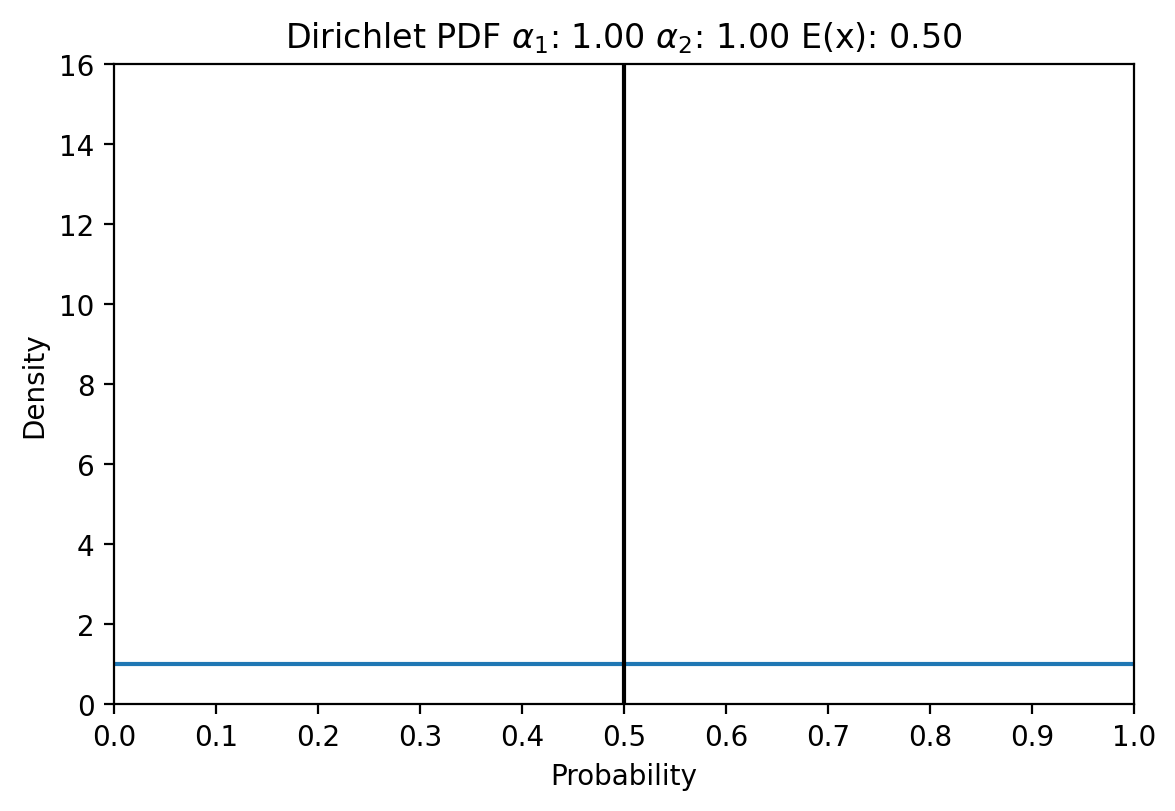

In [24]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = plt.axes([0.1, 0.12, 0.85, 0.8])


def dir_pdf(alphas):
    ax.clear()
    alpha_1 = alphas[0]
    alpha_2 = alphas[1]
    xs = np.arange(0, 1.01, 0.01)
    dir_pdf = np.array([dirichlet.pdf([x], (alpha_1, alpha_2)) for x in xs])
    ax.plot(xs, dir_pdf)
    d_mean = dirichlet.mean((alpha_1, alpha_2))
    ax.plot(np.tile(d_mean[0], 17), np.arange(0, 17), 'k-')
    ax.set_title(f"Dirichlet PDF $\\alpha_1$: {alpha_1:0.2f} $\\alpha_2$: {alpha_2:0.2f} E(x): {d_mean[0]:0.2f}")
    ax.set_xlabel("Probability")
    ax.set_ylabel("Density")
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_ylim(0, 16)
    ax.set_xlim(0, 1)


    
anim = FuncAnimation(fig, dir_pdf, frames=alphas, interval=100)
anim.save("dirichlet_pdf.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


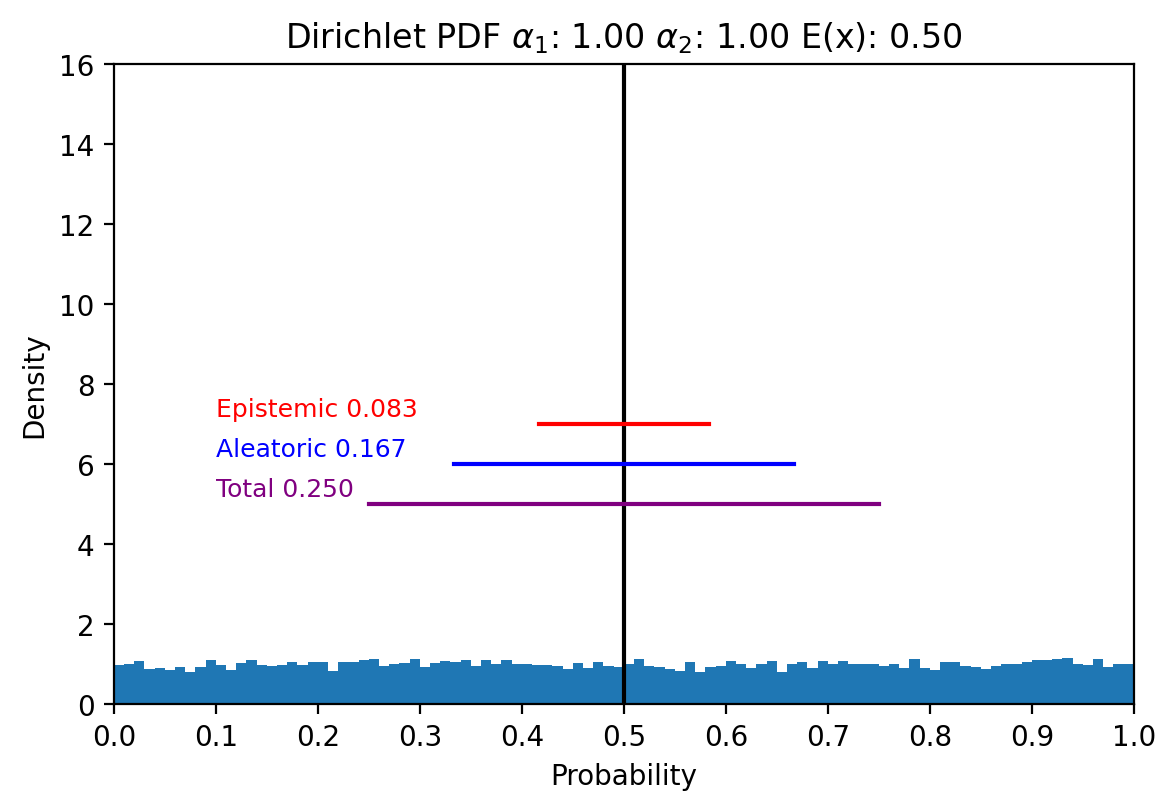

In [209]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = plt.axes([0.1, 0.12, 0.85, 0.8])


def dir_pdf_unc(alphas):
    ax.clear()
    alpha_1 = alphas[0]
    alpha_2 = alphas[1]
    a_sum = np.sum(alphas)
    dir_samples = dirichlet.rvs((alpha_1, alpha_2), size=10000)
    ax.hist(dir_samples[:, 0], bins=np.arange(0, 1.01, 0.01), density=True)
    d_mean = dirichlet.mean((alpha_1, alpha_2))
    total_unc = alpha_1 / a_sum - (alpha_1 / a_sum) ** 2
    epi_unc = alpha_1 / a_sum * (1 - alpha_1 / a_sum) / (a_sum + 1)
    ale_unc = total_unc - epi_unc
    ax.plot(np.tile(d_mean[0], 17), np.arange(0, 17), 'k-')
    ax.plot([d_mean[0] - total_unc, d_mean[0] + total_unc], [5, 5], '-', color='purple')
    ax.plot([d_mean[0] - ale_unc, d_mean[0] + ale_unc], [6, 6], 'b-')
    ax.plot([d_mean[0] - epi_unc, d_mean[0] + epi_unc], [7, 7], 'r-')
    ax.text(0.1, 7.2, f"Epistemic {epi_unc:0.3f}", color="r", fontsize=9)
    ax.text(0.1, 6.2, f"Aleatoric {ale_unc:0.3f}", color="b", fontsize=9)
    ax.text(0.1, 5.2, f"Total {total_unc:0.3f}", color="purple", fontsize=9)
    ax.set_title(f"Dirichlet PDF $\\alpha_1$: {alpha_1:0.2f} $\\alpha_2$: {alpha_2:0.2f} E(x): {d_mean[0]:0.2f}")
    ax.set_xlabel("Probability")
    ax.set_ylabel("Density")
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_ylim(0, 16)
    ax.set_xlim(0, 1)

dir_pdf_unc((25, 1))
    
anim = FuncAnimation(fig, dir_pdf_unc, frames=alphas[:-1], interval=100)
anim.save("dirichlet_unc.gif")

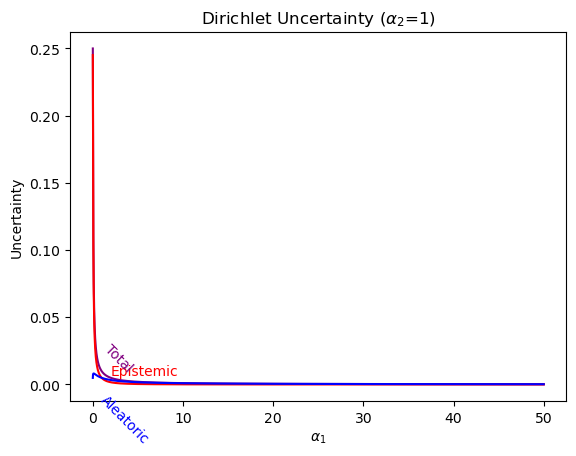

In [4]:
alpha_1 = np.arange(0.01, 50, 0.01)
a_sum = alpha_1 + 0.01
total_unc = alpha_1 / a_sum - (alpha_1 / a_sum) ** 2
epi_unc = alpha_1 / a_sum * (1 - alpha_1 / a_sum) / (a_sum + 1)
ale_unc = total_unc - epi_unc
plt.plot(alpha_1, total_unc, color='purple')
plt.plot(alpha_1, epi_unc, color='red')
plt.plot(alpha_1, ale_unc, color='blue')
plt.xlabel("$\\alpha_1$")
plt.ylabel("Uncertainty")
plt.text(alpha_1[200], (epi_unc)[200] + 0.005, "Epistemic", color='red', rotation=0)
plt.text(alpha_1[50], (ale_unc)[50] - 0.05, "Aleatoric", color='blue', rotation=-45)
plt.text(alpha_1[100], (total_unc)[100], "Total", color='purple', rotation=-45, )
plt.title("Dirichlet Uncertainty ($\\alpha_2$=1)")
plt.savefig("dirichlet_unc_budget.png", dpi=200, bbox_inches="tight")

#plt.gca().set_yscale('log')

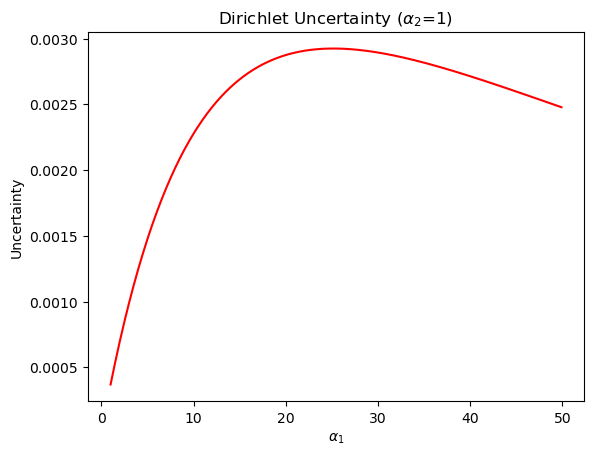

In [196]:
alpha_1 = np.arange(1, 50, 0.1)
a_sum = alpha_1 + 50
total_unc = alpha_1 / a_sum - (alpha_1 / a_sum) ** 2
epi_unc = alpha_1 / a_sum * (1 - alpha_1 / a_sum) / (a_sum + 1)
ale_unc = total_unc - epi_unc
#plt.plot(alpha_1, total_unc, color='purple')
plt.plot(alpha_1, epi_unc, color='red')
#plt.plot(alpha_1, ale_unc, color='blue')
plt.xlabel("$\\alpha_1$")
plt.ylabel("Uncertainty")
#plt.text(alpha_1[200], (epi_unc)[200] + 0.005, "Epistemic", color='red', rotation=0)
#plt.text(alpha_1[50], (ale_unc)[50] - 0.05, "Aleatoric", color='blue', rotation=-45)
#plt.text(alpha_1[100], (total_unc)[100], "Total", color='purple', rotation=-45, )
plt.title("Dirichlet Uncertainty ($\\alpha_2$=1)")
plt.savefig("dirichlet_unc_budget.png", dpi=200, bbox_inches="tight")

#plt.gca().set_yscale('log')

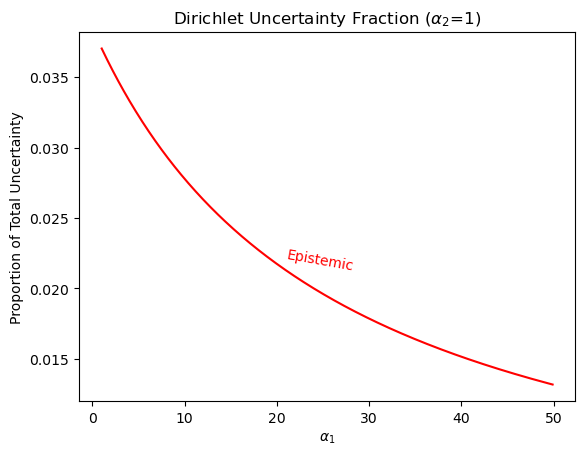

In [192]:
alpha_1 = np.arange(1, 50, 0.1)
a_sum = alpha_1 + 25
total_unc = alpha_1 / a_sum - (alpha_1 / a_sum) ** 2
epi_unc = alpha_1 / a_sum * (1 - alpha_1 / a_sum) / (a_sum + 1)
ale_unc = total_unc - epi_unc
plt.plot(alpha_1, epi_unc / total_unc, color='red', label="Epistemic")
plt.text(alpha_1[200], (epi_unc / total_unc)[200], "Epistemic", color='red', rotation=-10)
plt.xlabel("$\\alpha_1$")
plt.ylabel("Proportion of Total Uncertainty")
plt.title("Dirichlet Uncertainty Fraction ($\\alpha_2$=1)")
plt.savefig("dirichlet_unc_frac.png", dpi=200, bbox_inches="tight")
#plt.plot(alpha_1, ale_unc / total_unc, color='blue')

In [213]:
y = np.array([0, 0, 1])
alp = np.array([1, 50, 5])
y + (1 - y) * alp

array([ 1, 50,  1])